In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal, norm, expon, lognorm
from scipy.linalg import block_diag

from filterpy.kalman.sigma_points import MerweScaledSigmaPoints

from csnukf import ClosedSkewNormal

from scipy.optimize import minimize

In [2]:
# closed skew normal obsjects
csn_1 = ClosedSkewNormal(
    mu_z = np.array([[ 0.0]]),
    nu_z = np.array([[ 5.0]]),
    Sigma_z = np.array([[ 8.0]]),
    Gamma_z = np.array([[ 5.0]]),
    Delta_z = np.array([[ 3.0]])
)

csn_2 = ClosedSkewNormal(
    mu_z = np.array([[-1.8]]),
    nu_z = np.array([[0.5]]),
    Sigma_z = np.array([[ 1.5]]),
    Gamma_z = np.array([[-2.0]]),
    Delta_z = np.array([[1.0]])
)

csn_3 = csn_1 + csn_2

In [3]:
# Monte Carlo summation
n_samples = int(1e6)
csn1_samples = csn_1.rvs(n_samples)
csn2_samples = csn_2.rvs(n_samples)

csn3_samples = csn1_samples + csn2_samples

c=f(x)/g(x) : [11.68704212]=[1.64842686]/0.1410473958869391
c=f(x)/g(x) : [7.93808671]=[2.58571274]/0.32573500793527993


In [4]:
print(csn_1 + csn_2)

Closed Skewed Normal
  n, q:
(1, 2)
Bivariate parameters:
  mu:
[-1.8 -5.  -0.5]
  Sigma:
[[  9.5  40.   -3. ]
 [ 40.  203.    0. ]
 [ -3.    0.    7. ]]
Distribution parameters:
  mu_z:
[-1.8]
  Sigma_z:
[[9.5]]
  Gamma_z:
[[ 4.21052632]
 [-0.31578947]]
  nu_z:
[5.  0.5]
  Delta_z:
[[34.57894737 12.63157895]
 [12.63157895  6.05263158]]



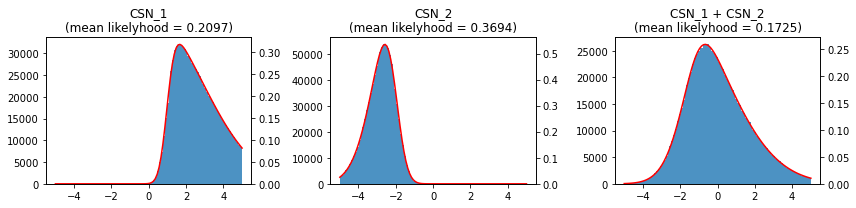

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

bins = np.linspace(-5, 5, 100)

ax = axes[0]
ax.set_title("CSN_1\n(mean likelyhood = {:.4f})".format(csn_1.pdf_z(csn1_samples).mean()))
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2\n(mean likelyhood = {:.4f})".format(csn_2.pdf_z(csn2_samples).mean()))
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_1 + CSN_2\n(mean likelyhood = {:.4f})".format(csn_3.pdf_z(csn3_samples).mean()))
ax.hist(csn3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()